# CODE

## 1. Importing the Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
from keras.models import Sequential
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from sklearn.metrics import confusion_matrix
from sklearn import datasets, svm, metrics


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 2. Loading the Data

In [ ]:
df_train=pd.read_csv('/content/drive/MyDrive/mnist/fashion-mnist_train.csv')
df_test=pd.read_csv('/content/drive/MyDrive/mnist/fashion-mnist_test.csv')

## 3. Visualising the Data and 4. Pre-processing

In [ ]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,0,0,105,92,101,107,100,132,0,0,2,4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,150,...,211,220,214,74,0,255,222,128,0,0,0,0,0,0,0,0,0,44,12,0,0,40,134,162,191,214,163,146,165,79,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,0,114,183,112,55,23,72,102,165,160,28,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,24,188,163,93,...,171,249,207,197,202,45,0,3,0,0,0,0,0,0,0,0,0,0,1,0,0,0,22,21,25,69,52,45,74,39,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,0,0,0,46,0,21,68,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,25,187,189,...,230,237,229,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,68,116,112,136,147,144,121,102,63,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,0,0,34,29,7,0,11,24,0,0,3,3,1,0,1,1,0,0,0,0,0,4,0,0,1,0,0,0,0,0,...,242,245,224,245,234,0,3,0,0,0,0,0,0,0,0,0,0,0,0,37,69,94,123,127,138,138,142,145,135,125,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,209,190,181,150,170,193,180,219,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,...,248,238,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,174,233,155,0,65,235,216,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,17,0,0,0,0,0,0,0,0,12,94,68,14,0,0,0,0,0,0,0,0,0,0,0,38,106,94,89,94,68,...,0,0,0,0,0,0,87,12,26,0,0,0,0,0,0,0,46,50,29,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,161,212,138,150,169,164,176,202,255,183,26,0,0,0,0,0,0,0,0,0,0,0,1,0,0,129,221,255,255,215,...,255,255,254,252,255,101,196,254,252,100,0,0,0,0,0,168,232,225,0,41,172,147,148,153,155,146,137,141,143,137,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,0,37,0,0,0,0,0,0,17,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,21,204,235,...,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,69,0,2,0,0,0,0,0,0,0,0,0,0


In [ ]:
train_data = np.array(df_train, dtype = 'float32')
test_data = np.array(df_test, dtype='float32')

In [ ]:
# type(train_data)
# train_data.shape

In [ ]:
x_train = train_data[:,1:]/255

y_train = train_data[:,0]

x_test= test_data[:,1:]/255

y_test=test_data[:,0]

In [ ]:
# type(y_train)

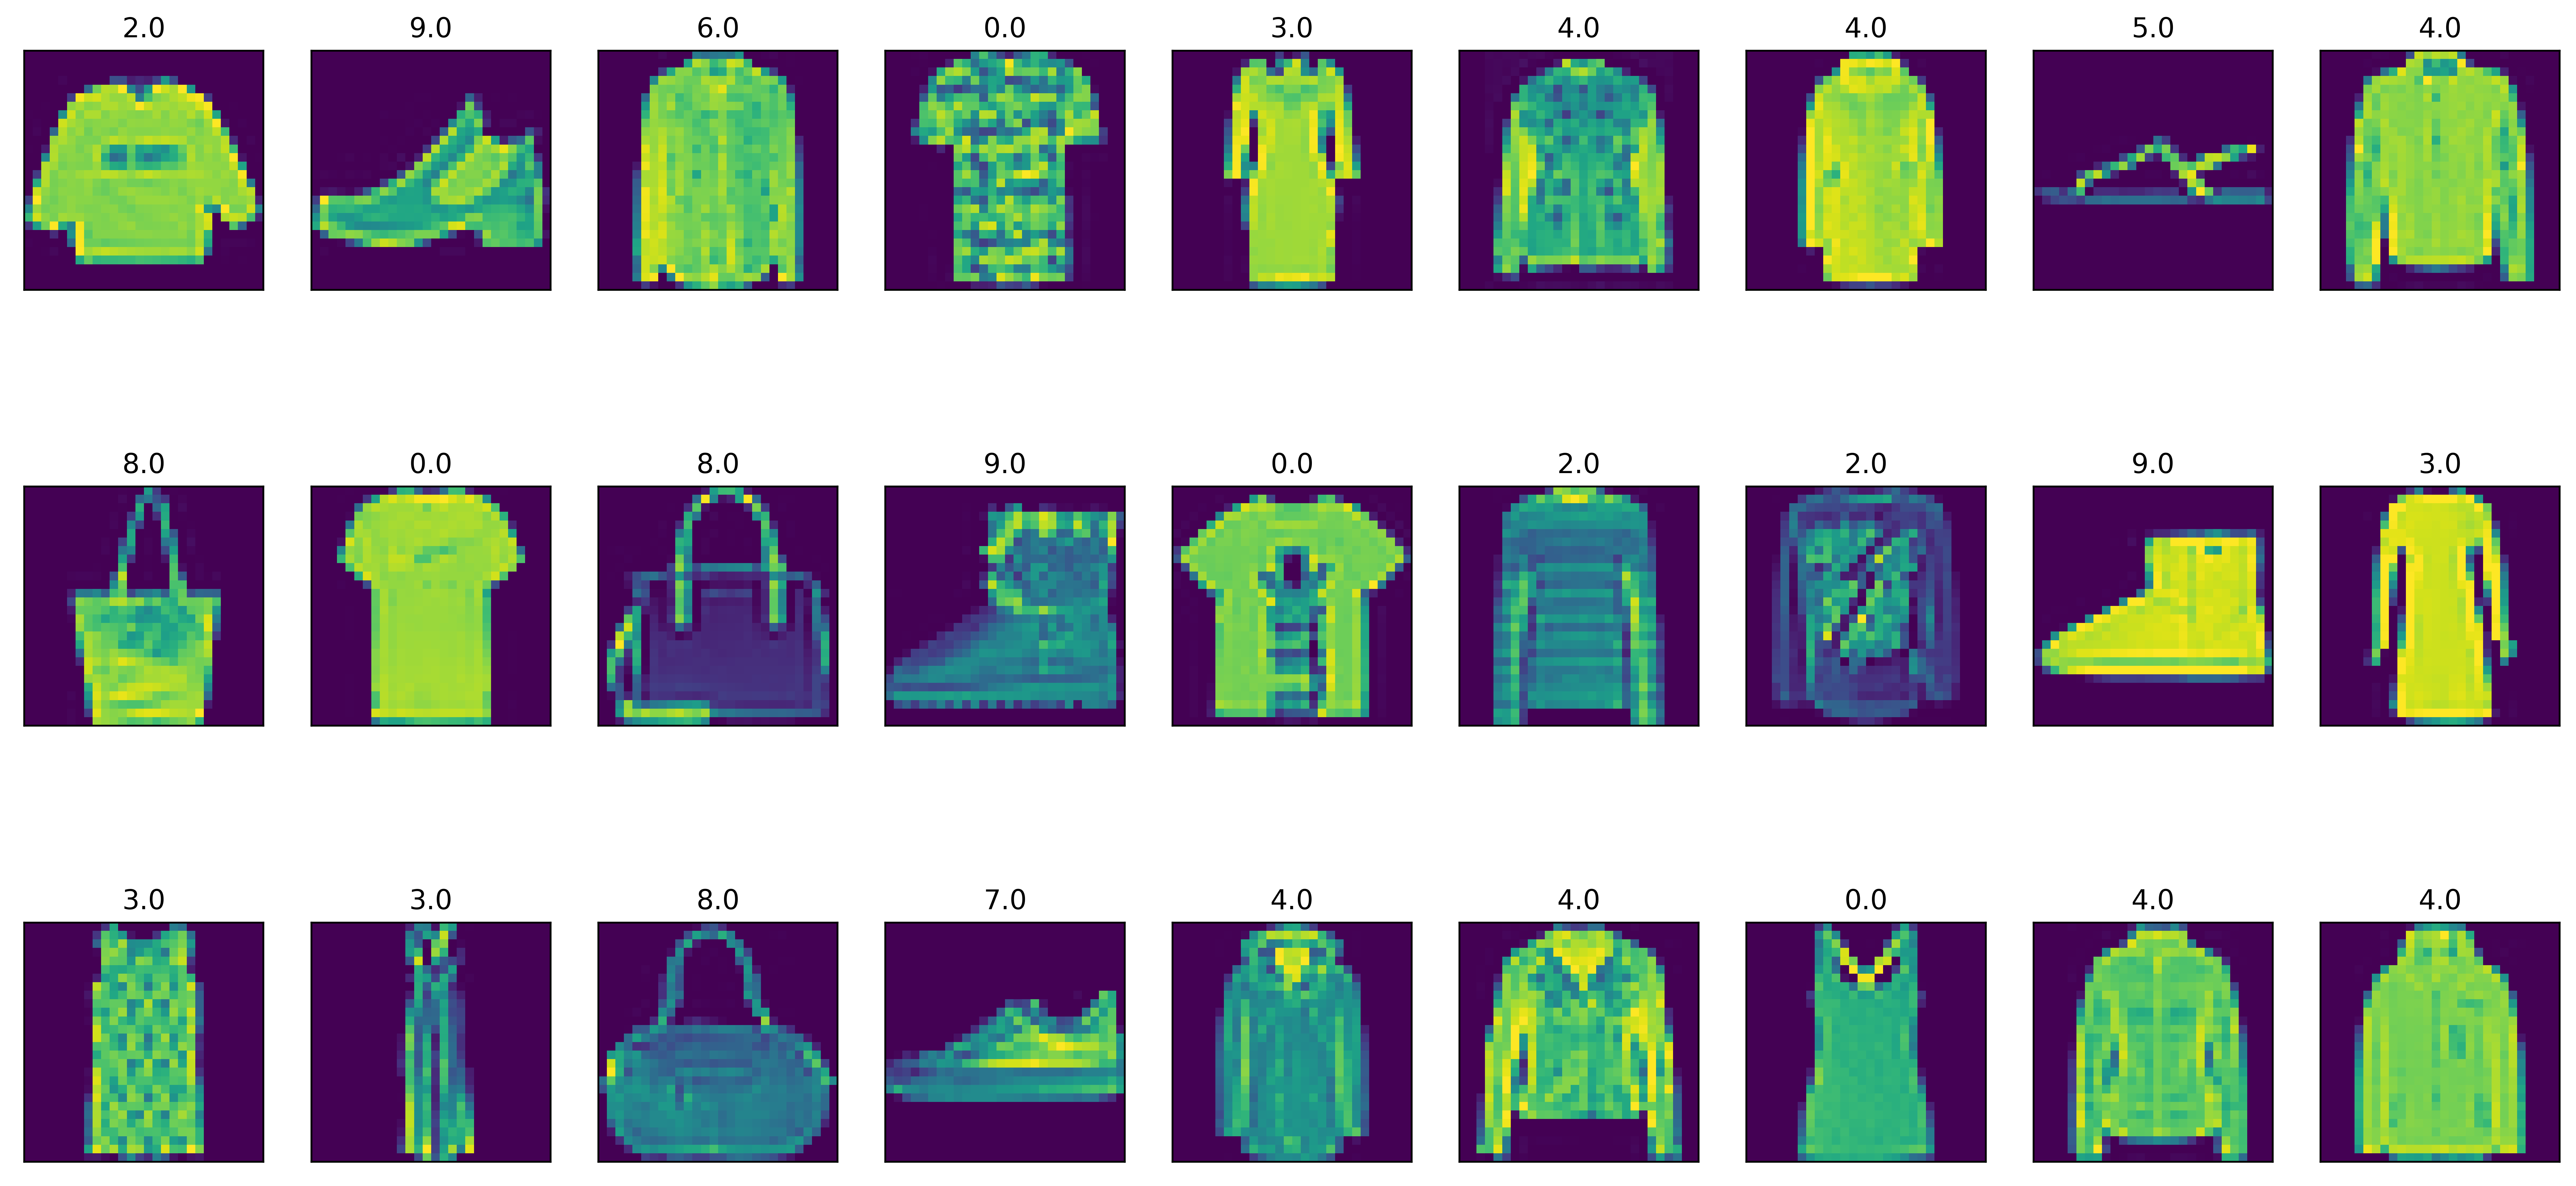

In [ ]:
plt.figure(figsize=(20, 10), dpi = 500)
for i in range(27):
    plt.subplot(3, 9, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i].reshape((28,28)))
    plt.title(y_train[i])
plt.show()

## 5. Building the Model and Evaluating performance

### Model 1

No. of convolution filters = 64

In [ ]:
x_train = x_train.reshape(x_train.shape[0],*(28,28,1))
x_test = x_test.reshape(x_test.shape[0],*(28,28,1))
  # x_validate = x_validate.reshape(x_validate.shape[0],*(28,28,1))

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax') 
])

In [ ]:
model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [ ]:
history = model.fit(
    x_train,
    y_train,
    epochs=1,
    verbose=1,
    validation_data=(x_test,y_test),
)

1875/1875 [==============================] - 88s 46ms/step - loss: 0.4581 - accuracy: 0.8329 - val_loss: 0.3382 - val_accuracy: 0.8761


In [ ]:
test_predictions = model.predict(x_test)

In [ ]:
confusion = confusion_matrix(y_test, np.argmax(test_predictions,axis=1))

In [ ]:
confusion

array([[864,   5,  24,  47,   2,   0,  42,   0,  15,   1],
       [  1, 988,   1,   7,   1,   0,   2,   0,   0,   0],
       [ 11,   2, 864,  13,  74,   0,  27,   0,   9,   0],
       [ 13,  25,  12, 912,  31,   0,   7,   0,   0,   0],
       [  0,   6,  89,  18, 862,   0,  23,   0,   2,   0],
       [  0,   1,   0,   1,   0, 941,   0,  27,   3,  27],
       [196,  12, 150,  43, 136,   0, 449,   0,  14,   0],
       [  0,   0,   0,   0,   0,   4,   0, 917,   0,  79],
       [  1,   3,   3,   2,   2,   0,   2,   1, 984,   2],
       [  0,   0,   0,   0,   0,   0,   0,  19,   1, 980]])

In [ ]:
predicted = model.predict(x_test)

In [ ]:
metrics.classification_report(y_test, predicted)

ValueError: ignored

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'],color='blue', label='Loss')
plt.plot(history.history['val_loss'],color='orange', label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function / Cross Entropy Loss')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'],color='blue', label='Accuracy')
plt.plot(history.history['val_accuracy'],color='orange', label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy / Classification Accuracy')
plt.show()

### Model 2

No. of convolution filters = 32

In [ ]:
model2 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10,activation = 'softmax') 
])

In [ ]:
model2.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [ ]:
history2 = model2.fit(
    x_train,
    y_train,
    epochs=30,
    verbose=2,
    validation_data=(x_test,y_test),
)

Epoch 1/30
1875/1875 - 44s - loss: 0.3907 - accuracy: 0.8582 - val_loss: 0.3388 - val_accuracy: 0.8783 - 44s/epoch - 23ms/step
Epoch 2/30
1875/1875 - 43s - loss: 0.3208 - accuracy: 0.8832 - val_loss: 0.3036 - val_accuracy: 0.8863 - 43s/epoch - 23ms/step
Epoch 3/30
1875/1875 - 43s - loss: 0.2839 - accuracy: 0.8965 - val_loss: 0.3132 - val_accuracy: 0.8854 - 43s/epoch - 23ms/step
Epoch 4/30
1875/1875 - 43s - loss: 0.2592 - accuracy: 0.9038 - val_loss: 0.2608 - val_accuracy: 0.9028 - 43s/epoch - 23ms/step
Epoch 5/30
1875/1875 - 43s - loss: 0.2380 - accuracy: 0.9121 - val_loss: 0.2474 - val_accuracy: 0.9114 - 43s/epoch - 23ms/step
Epoch 6/30
1875/1875 - 43s - loss: 0.2188 - accuracy: 0.9187 - val_loss: 0.2429 - val_accuracy: 0.9095 - 43s/epoch - 23ms/step
Epoch 7/30
1875/1875 - 42s - loss: 0.2058 - accuracy: 0.9240 - val_loss: 0.2406 - val_accuracy: 0.9133 - 42s/epoch - 23ms/step
Epoch 8/30
1875/1875 - 42s - loss: 0.1884 - accuracy: 0.9295 - val_loss: 0.2450 - val_accuracy: 0.9145 - 42s/ep

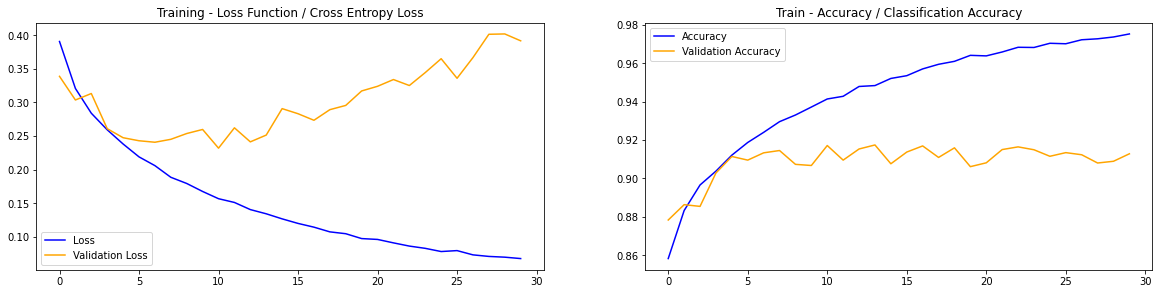

In [ ]:
plt.figure(figsize=(20, 10))

plt.subplot(2, 2, 1)
plt.plot(history2.history['loss'],color='blue', label='Loss')
plt.plot(history2.history['val_loss'],color='orange', label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function / Cross Entropy Loss')

plt.subplot(2, 2, 2)
plt.plot(history2.history['accuracy'],color='blue', label='Accuracy')
plt.plot(history2.history['val_accuracy'],color='orange', label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy / Classification Accuracy')
plt.show()